# Dataset
**Data Description**

**Dataset: Sleep Health and Lifestyle Dataset**

Description:
This dataset contains comprehensive information related to individuals’ sleep patterns, lifestyle habits, and health indicators. Each row represents one individual and includes demographic details, sleep-related attributes, lifestyle factors, and cardiovascular health measures.

Key variables include age, gender, occupation, sleep duration, quality of sleep, physical activity level, stress level, BMI category, blood pressure, heart rate, daily step count, and the presence or absence of sleep disorders.

The dataset integrates both behavioral and physiological features, making it suitable for predictive modeling and health risk analysis related to sleep disorders.

**Purpose**

The dataset is used to predict the presence and type of sleep disorders in individuals.
For this project, the target variable Sleep_disorder is treated as a multi-class classification problem with three classes:

None

Insomnia

Sleep Apnea

The objective is to build machine learning models that can accurately classify individuals based on their lifestyle and health attributes.

***Applications***

Early detection of sleep disorders

Identification of lifestyle and health risk factors

Personalized healthcare and sleep management strategies

Support for clinical decision-making

Healthcare-focused machine learning modeling

***Relevance***

This is a real-world healthcare dataset that demonstrates how machine learning can be applied to predict sleep disorders and analyze the impact of lifestyle and medical factors on sleep health. The project highlights the role of data-driven approaches in improving preventive healthcare and patient outcomes.

# import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# load data

In [2]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [5]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [6]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

# STEP-2 EDA 

In [7]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [8]:
# idemtify target variable 

In [9]:
# target column
df['Sleep Disorder'].value_counts()


Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [10]:
# target distribution (percentage)
df['Sleep Disorder'].value_counts(normalize=True) * 100


Sleep Disorder
Sleep Apnea    50.322581
Insomnia       49.677419
Name: proportion, dtype: float64

In [11]:
# seprate numerical and categoricla column 

In [12]:
df.drop('Person ID', axis=1, inplace=True)


In [13]:
# Split blood pressure into systolic and diastolic
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True)

# Convert to numeric
df['Systolic_BP'] = df['Systolic_BP'].astype(int)
df['Diastolic_BP'] = df['Diastolic_BP'].astype(int)

# Drop original column
df.drop('Blood Pressure', axis=1, inplace=True)


In [14]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print("Numerical Columns:\n", num_cols)
print("\nCategorical Columns:\n", cat_cols)


Numerical Columns:
 Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic_BP',
       'Diastolic_BP'],
      dtype='object')

Categorical Columns:
 Index(['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder'], dtype='object')


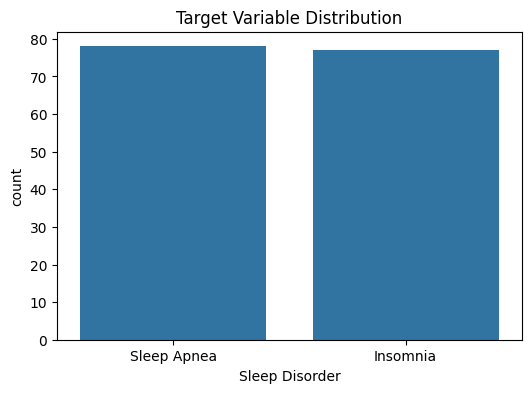

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Sleep Disorder', data=df)
plt.title('Target Variable Distribution')
plt.show()


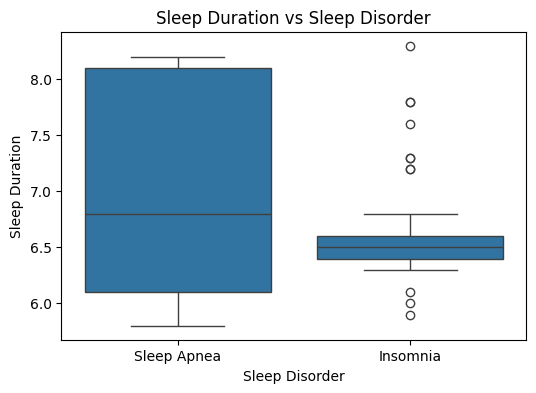

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Sleep Disorder', y='Sleep Duration', data=df)
plt.title('Sleep Duration vs Sleep Disorder')
plt.show()


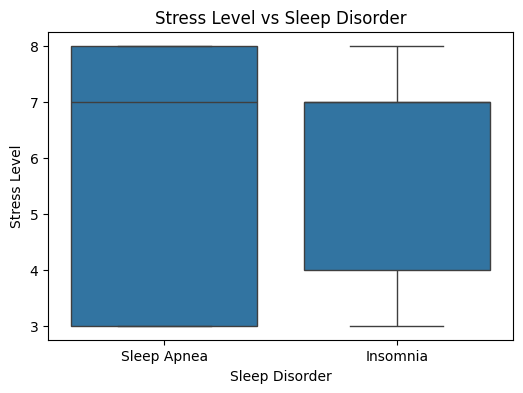

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Sleep Disorder', y='Stress Level', data=df)
plt.title('Stress Level vs Sleep Disorder')
plt.show()


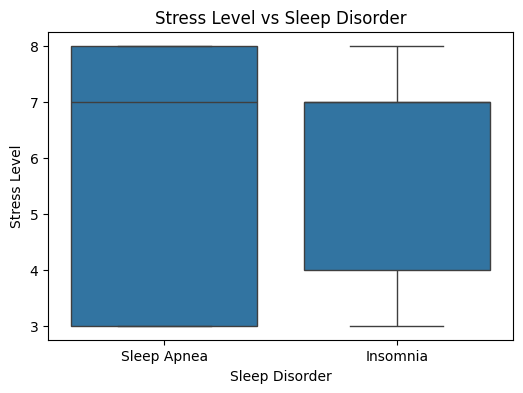

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Sleep Disorder', y='Stress Level', data=df)
plt.title('Stress Level vs Sleep Disorder')
plt.show()


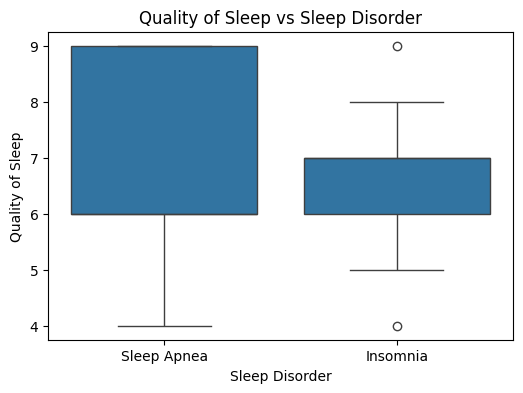

In [19]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Sleep Disorder', y='Quality of Sleep', data=df)
plt.title('Quality of Sleep vs Sleep Disorder')
plt.show()


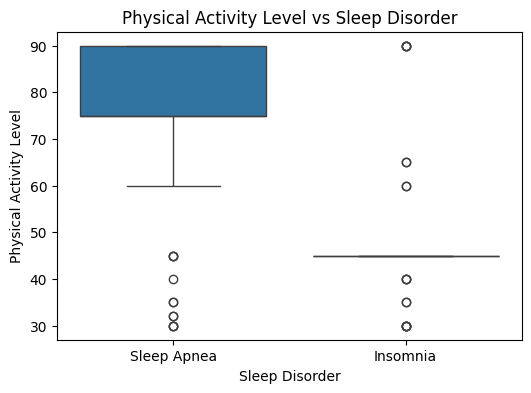

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Sleep Disorder', y='Physical Activity Level', data=df)
plt.title('Physical Activity Level vs Sleep Disorder')
plt.show()


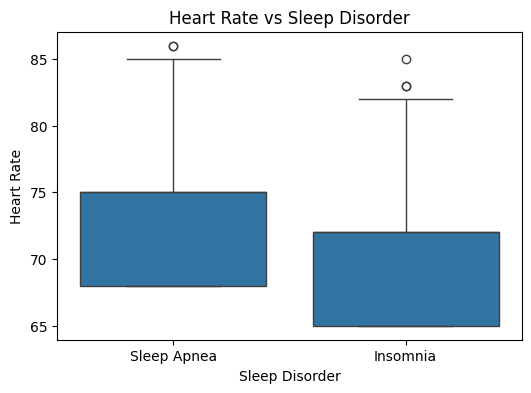

In [21]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Sleep Disorder', y='Heart Rate', data=df)
plt.title('Heart Rate vs Sleep Disorder')
plt.show()


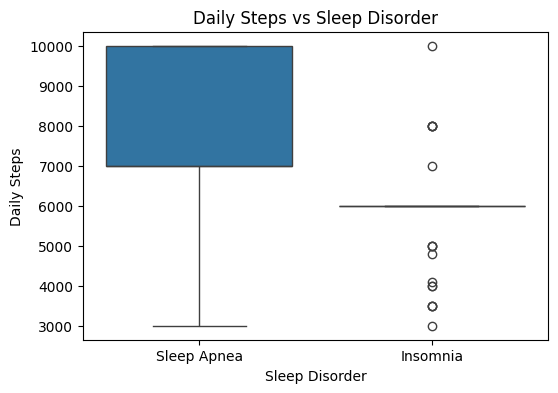

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Sleep Disorder', y='Daily Steps', data=df)
plt.title('Daily Steps vs Sleep Disorder')
plt.show()


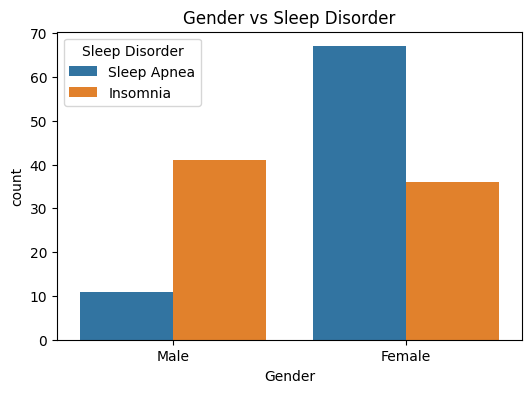

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Sleep Disorder', data=df)
plt.title('Gender vs Sleep Disorder')
plt.show()


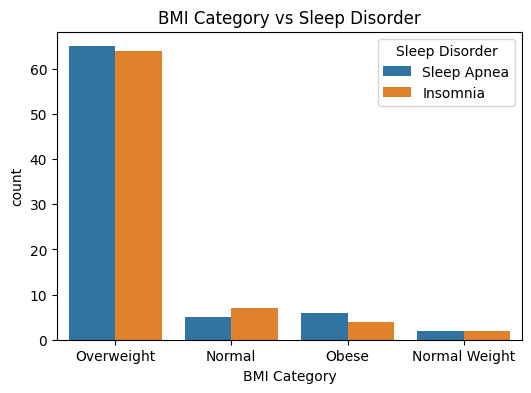

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x='BMI Category', hue='Sleep Disorder', data=df)
plt.title('BMI Category vs Sleep Disorder')
plt.show()


# correlation heatmap

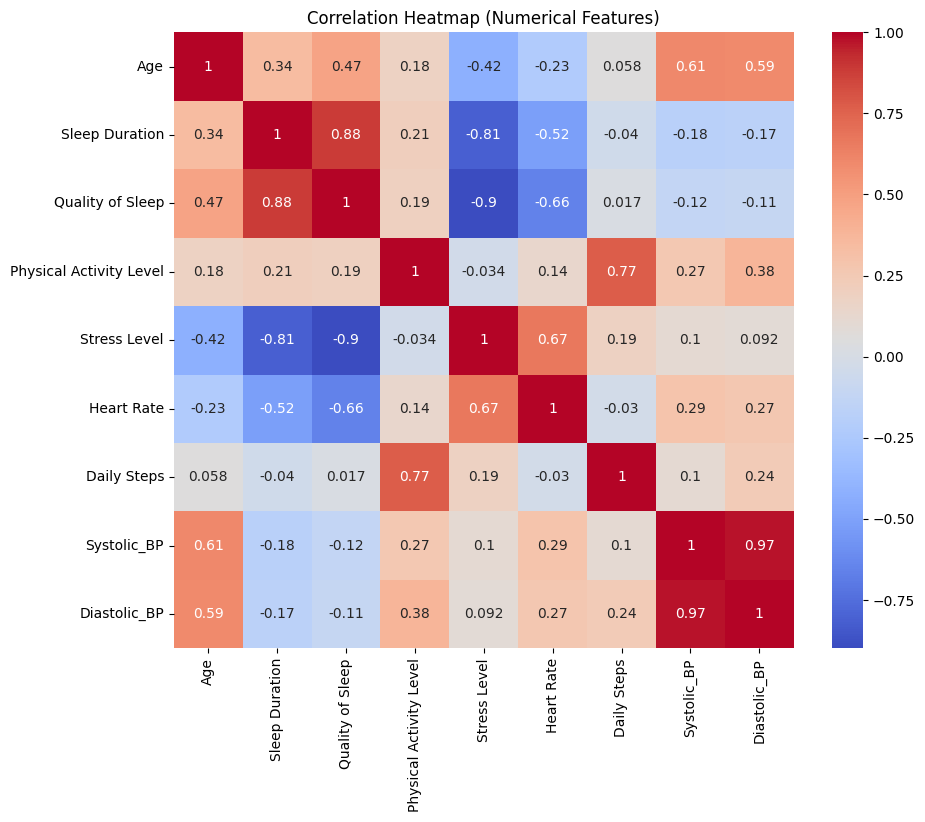

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(
    df.select_dtypes(include=['int64', 'float64']).corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()


# STEP-3 Feature Engineering & Preprocessing

In [26]:
df.columns


Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Sleep Disorder', 'Systolic_BP', 'Diastolic_BP'],
      dtype='object')

In [27]:
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)


Numerical Columns: Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic_BP',
       'Diastolic_BP'],
      dtype='object')
Categorical Columns: Index(['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder'], dtype='object')


# encoding categorical variable

In [28]:
from sklearn.preprocessing import LabelEncoder  # encode categorical features for training model 

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


# feature scaling

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


# Separate Features (X) and Target (y)

In [30]:
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']


# STEP-4 MODEL TRAINING AND BUILDING

# logistic regression 

In [31]:
# Separate features (X) and target (y)
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']


In [32]:
# One-hot encoding categorical features
X = pd.get_dummies(X, drop_first=True)


In [33]:
# train test split

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [35]:
# feature scaling for logistic regression  model 

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [37]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42)

log_reg.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [38]:
y_pred = log_reg.predict(X_test_scaled)


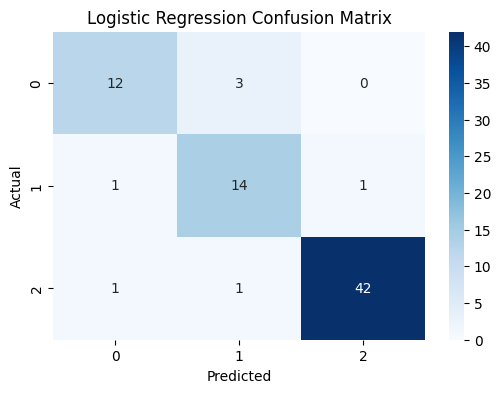

In [39]:
# confusion matrix 
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


# decision tree

In [40]:
print(df.columns)


Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Sleep Disorder', 'Systolic_BP', 'Diastolic_BP'],
      dtype='object')


Accuracy: 0.8933333333333333
Confusion Matrix:
 [[14  1  1]
 [ 4 11  1]
 [ 1  0 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.88      0.80        16
           1       0.92      0.69      0.79        16
           2       0.95      0.98      0.97        43

    accuracy                           0.89        75
   macro avg       0.87      0.85      0.85        75
weighted avg       0.90      0.89      0.89        75

Feature Importance:
                     Feature  Importance
7              BMI Category    0.515683
5   Physical Activity Level    0.289767
10              Systolic_BP    0.078863
1                       Age    0.042974
8                Heart Rate    0.030107
0                    Gender    0.015783
11             Diastolic_BP    0.012057
3            Sleep Duration    0.009444
9               Daily Steps    0.002877
2                Occupation    0.002445
6              Stress Level    0.000000
4        

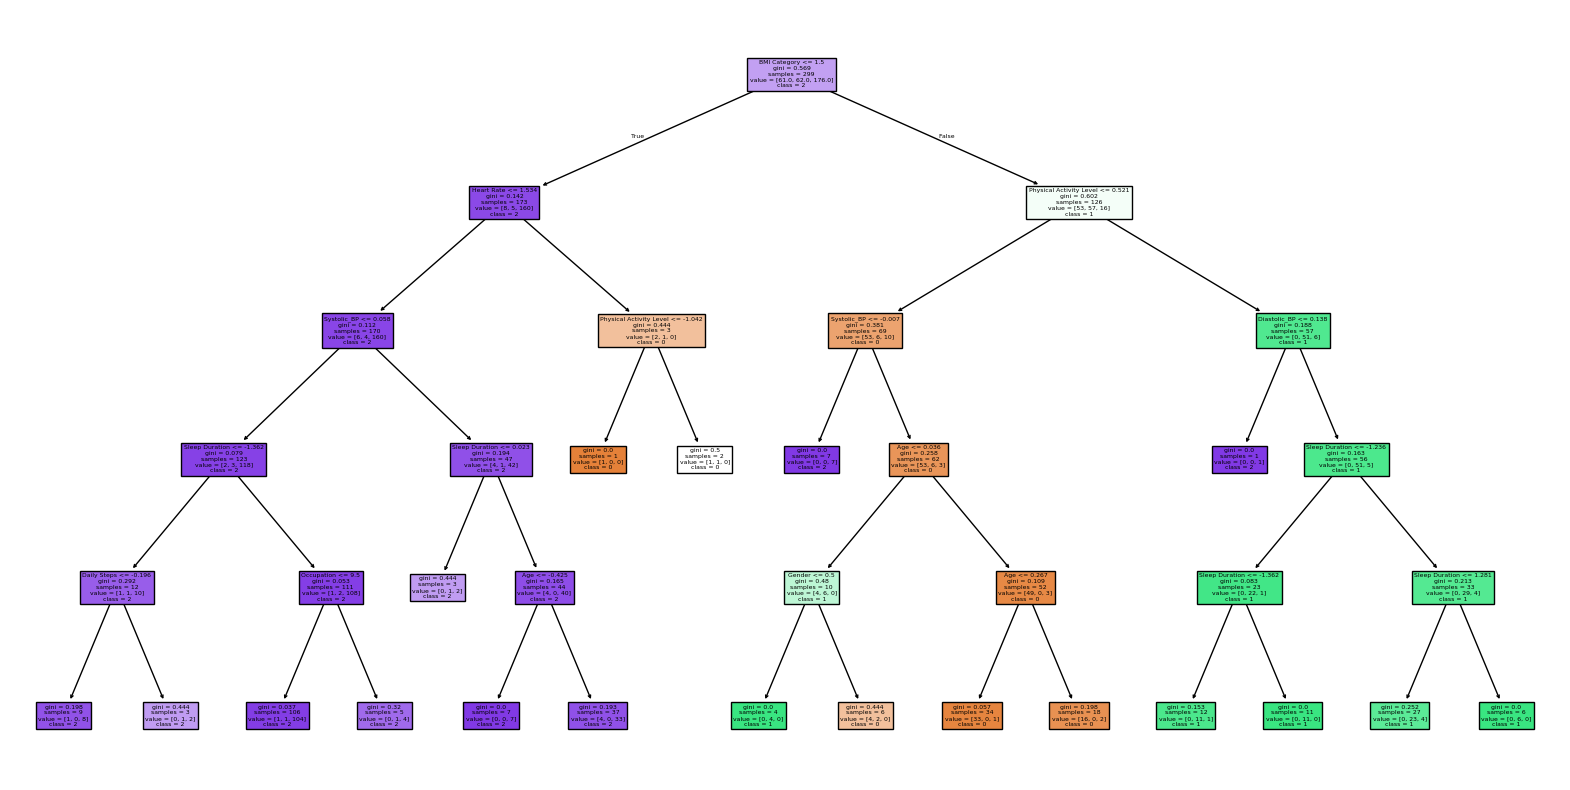

In [41]:
# ------------------------
# Import Libraries
# ------------------------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# ------------------------
# Step 0: Load your dataset
# ------------------------
# df = pd.read_csv('your_dataset.csv')  # Uncomment if loading from CSV
df = df.copy()  # Assuming df is already your dataframe

# ------------------------
# Step 1: Handle missing values
# ------------------------
# Fill numerical columns with median
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical columns with mode and encode
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])
    df[col] = LabelEncoder().fit_transform(df[col])

# ------------------------
# Step 2: Define Features and Target
# ------------------------
X = df.drop('Sleep Disorder', axis=1)  # Correct column name with space
y = df['Sleep Disorder']

# ------------------------
# Step 3: Train-Test Split
# ------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------
# Step 4: Train Decision Tree
# ------------------------
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# ------------------------
# Step 5: Evaluate Model
# ------------------------
y_pred = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# ------------------------
# Step 6: Feature Importance
# ------------------------
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", importance)

# ------------------------
# Step 7: Visualize Decision Tree (Automatic Class Names)
# ------------------------
class_names = [str(cls) for cls in sorted(y.unique())]

plt.figure(figsize=(20,10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=class_names,
    filled=True
)
plt.show()


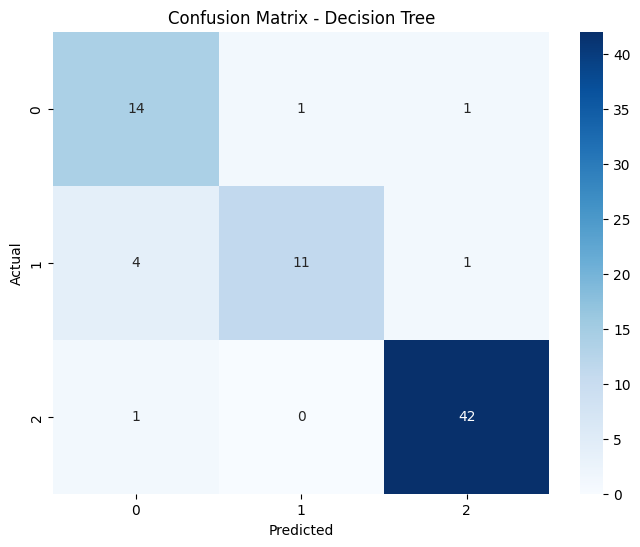

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,  # Automatically from previous code
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


# random forest

Accuracy: 0.88
Confusion Matrix:
 [[13  2  1]
 [ 4 11  1]
 [ 1  0 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.85      0.69      0.76        16
           2       0.95      0.98      0.97        43

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75

Random Forest Feature Importance:
                     Feature  Importance
7              BMI Category    0.170632
10              Systolic_BP    0.152580
11             Diastolic_BP    0.143113
2                Occupation    0.117113
1                       Age    0.098124
3            Sleep Duration    0.092790
5   Physical Activity Level    0.075313
9               Daily Steps    0.055667
8                Heart Rate    0.033186
6              Stress Level    0.032886
4          Quality of Sleep    0.023779
0        

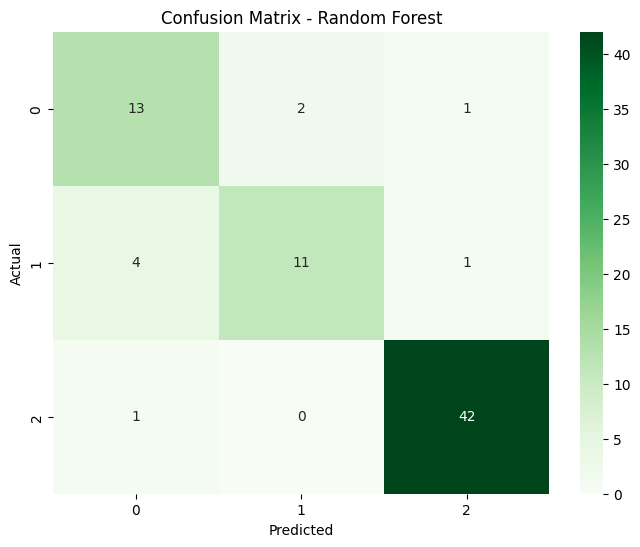

In [43]:
# ------------------------
# Import Libraries
# ------------------------
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# ------------------------
# Step 1: Initialize Random Forest
# ------------------------
rf_model = RandomForestClassifier(
    n_estimators=100,   # Number of trees
    max_depth=10,       # Limit depth to prevent overfitting
    random_state=42
)

# ------------------------
# Step 2: Train Random Forest
# ------------------------
rf_model.fit(X_train, y_train)

# ------------------------
# Step 3: Make Predictions
# ------------------------
y_pred_rf = rf_model.predict(X_test)

# ------------------------
# Step 4: Evaluate Model
# ------------------------
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# ------------------------
# Step 5: Feature Importance
# ------------------------
importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Random Forest Feature Importance:\n", importance_rf)

# ------------------------
# Step 6: Confusion Matrix Heatmap
# ------------------------
class_names = [str(cls) for cls in sorted(y.unique())]  # Auto class names

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\Manit Singh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
307 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Manit Singh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Manit Singh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy (Best RF): 0.88
Confusion Matrix:
 [[13  2  1]
 [ 4 11  1]
 [ 1  0 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.85      0.69      0.76        16
           2       0.95      0.98      0.97        43

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75

Feature Importance (Best RF):
                     Feature  Importance
7              BMI Category    0.193793
10              Systolic_BP    0.162292
11             Diastolic_BP    0.127820
2                Occupation    0.123135
1                       Age    0.100171
3            Sleep Duration    0.080227
5   Physical Activity Level    0.062256
9               Daily Steps    0.04

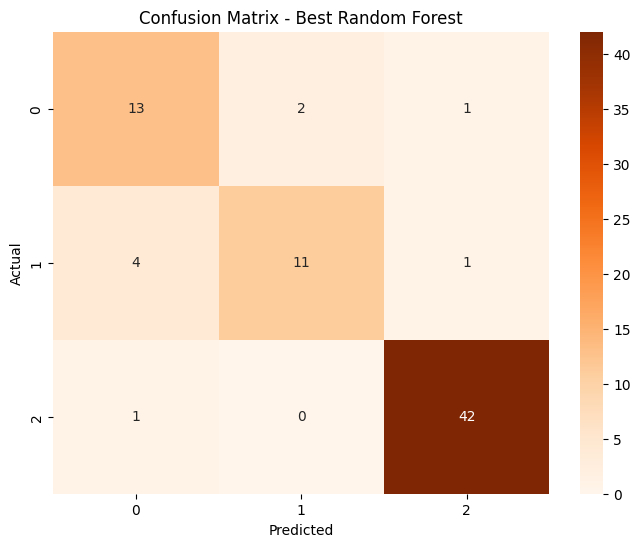

In [44]:
# ------------------------
# Import Libraries
# ------------------------
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------
# Step 1: Define the parameter grid
# ------------------------
param_grid = {
    'n_estimators': [100, 200, 300],       # Number of trees
    'max_depth': [5, 10, 15, None],        # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],       # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],         # Minimum samples in a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider at split
}

# ------------------------
# Step 2: Initialize Random Forest
# ------------------------
rf = RandomForestClassifier(random_state=42)

# ------------------------
# Step 3: Grid Search with Cross-Validation
# ------------------------
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                # 5-fold cross-validation
    n_jobs=-1,           # Use all CPU cores
    verbose=1,
    scoring='accuracy'
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# ------------------------
# Step 4: Best Parameters and Best Model
# ------------------------
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# ------------------------
# Step 5: Evaluate Best Model
# ------------------------
y_pred_best = best_rf.predict(X_test)

print("Accuracy (Best RF):", accuracy_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

# ------------------------
# Step 6: Feature Importance
# ------------------------
importance_best = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance (Best RF):\n", importance_best)

# ------------------------
# Step 7: Confusion Matrix Heatmap
# ------------------------
class_names = [str(cls) for cls in sorted(y.unique())]

cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8,6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Oranges',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best Random Forest')
plt.show()


In [45]:

# get clean csv file for our power bi 

In [60]:
df.to_csv("sleep_disorder_cleaned.csv", index=False)
